# 1. Draw factor graphs.
- Go through the breakout notes and pre­class work notes from previous sessions of CS146, find 2 models that we have discussed before, and draw a factor graph for each of them.
- You may use any statistical model in which we did inference during a breakout or in pre class work during previous sessions.
- Make sure you represent all variables, parameters, and factors in your graphs.
- Explain which models you chose and reference the sessions from which you extracted them.
- You can use Google Draw for this exercise or, if you prefer using LaTeX, you can try this package for specifying graphical models: https://github.com/jluttine/tikz-bayesnet

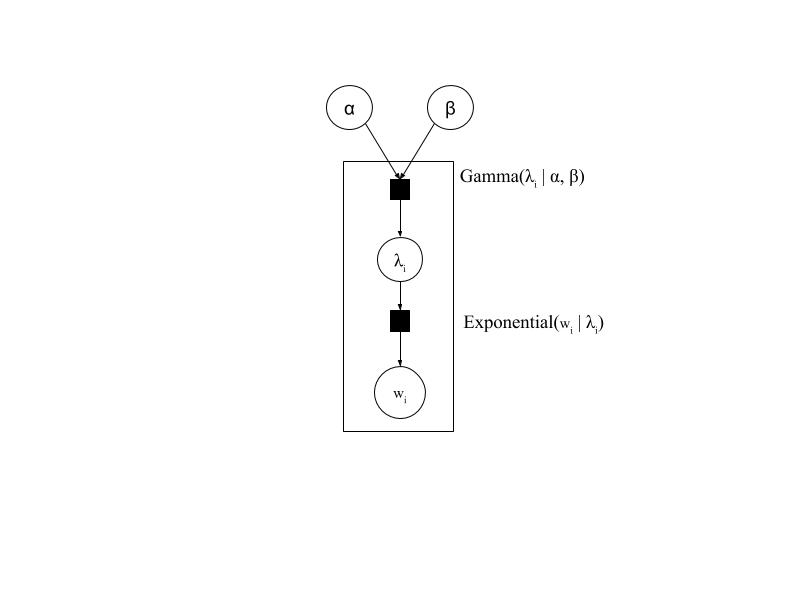

In [1]:
# CALL CENTER MODEL [Assignment I]
"""
lambda ~ Gamma(alpha, beta)
w[i] ~ Exponential(lambda)
"""
from PIL import Image
Image.open("Factor graph I.jpg")

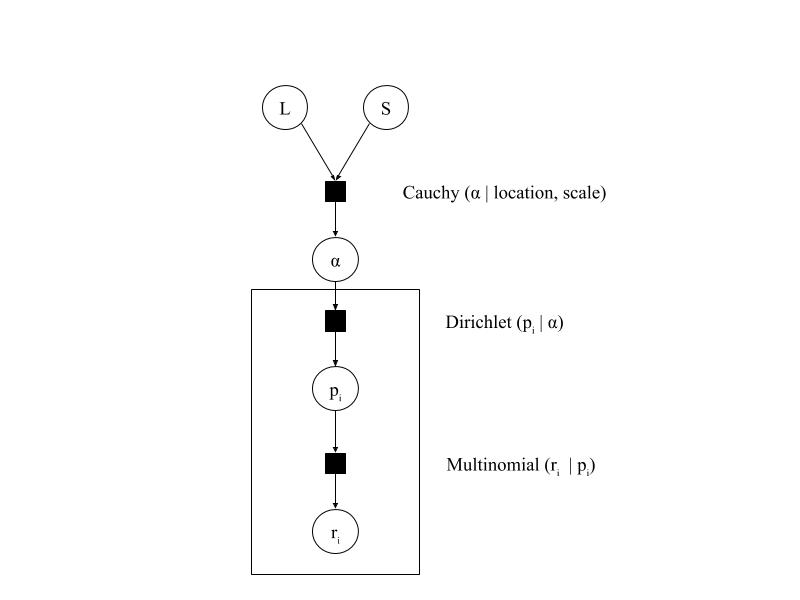

In [2]:
# ELECTION DATA [Session 7.2]
"""
alpha ~ Cauchy(location, scale)
p[i] ~ Dirichlet(alpha)
r[i] ~ Multinomial(p[i])
"""
Image.open("Factor graph II.jpg")

# 2. Generate samples from a directed graphical model
Below is a directed graphical model for the basketball model we discussed in Session 4.2.
Write Python code to generate and visualize samples from this model. Generate samples and plots for 3 different players and 4 games per player from this generative model.
Each player gets given an expected field goal rate from the uniform distribution. The expected field goal rate is always the same in all their games. In any particular game, the number of successful field goals is given by a binomial distribution.

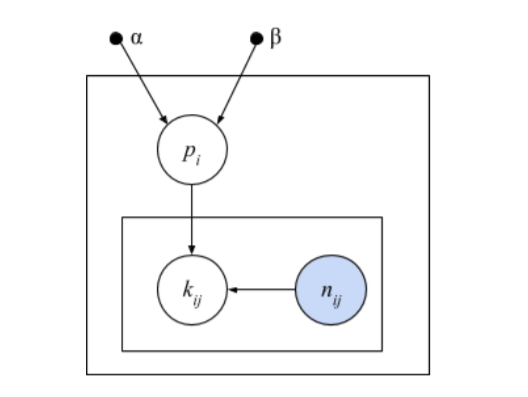

In [5]:
Image.open("Factor graph III.png")

Fixed hyperparameters: α = 1, β = 1.
Field goal success rate p for player i:

$$p_i{\sim}Beta\left(\alpha,\beta\right)$$

The number of field goals made $k_{ij}$ by player i in game j where $n_{ij}$ field goals were attempted:

$$k_{ij}\sim Binomial\left(n_{ij},p_i\right)$$

The full mathematical expression for this directed graph is the joint distribution

$$P\left(parameters,\ data\ \left|\ hyperparameters\right|\right)=P\left(\left\{P_i\right\},\left\{k_{ij}\right\}\right|\alpha,\ \beta,\ \left\{\left\{n_{ij}\right\}\right)$$

In [6]:
player_field_goal_data = {
    # http://www.espn.com/nba/player/gamelog/_/id/2594922/year/2018/otto-porter-jr
    'Otto Porter Jr': [(0, 0), (4, 9), (4, 8), (3, 7), (5, 10), (4, 7), (0, 0), (5, 8), (4, 9)],
    # http://www.espn.com/nba/player/gamelog/_/id/3024/year/2018/jj-redick
    'JJ Redick': [(5, 13), (3, 11), (6, 15), (9, 17), (7, 13), (6, 13), (8, 18), (4, 9), (4, 13)],
    # http://www.espn.com/nba/player/gamelog/_/id/3213/year/2018/al-horford
    'Al Horford': [(7, 12), (2, 8), (4, 9), (5, 13), (2, 4), (5, 13), (8, 10), (7, 16), (4, 6)],}

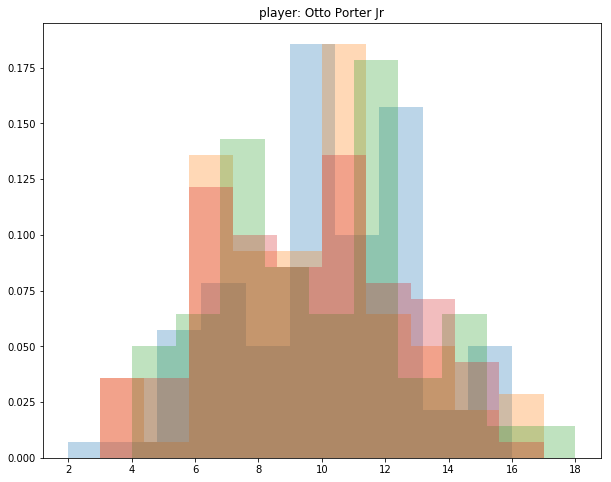

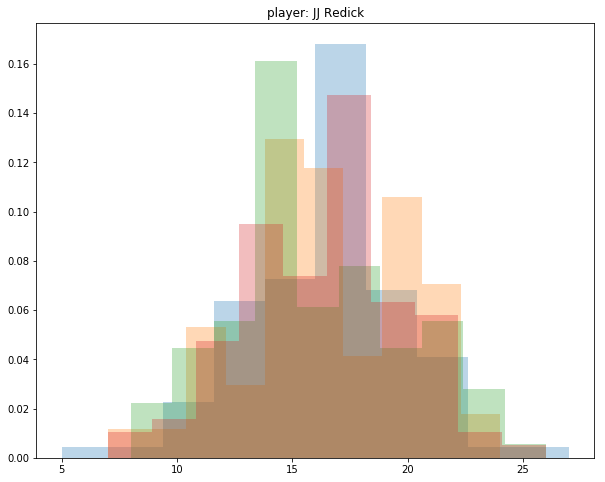

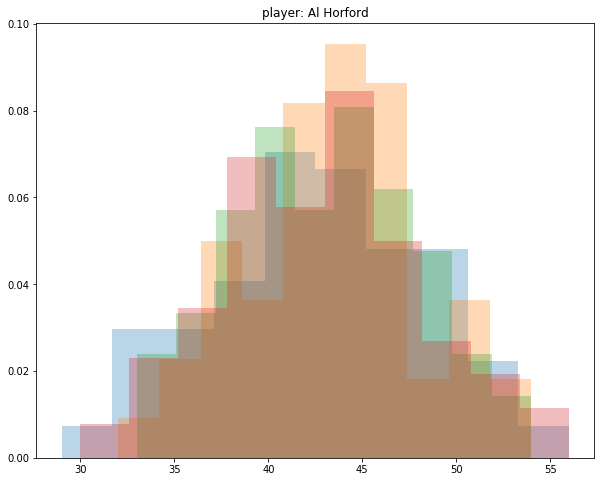

In [27]:
from scipy import stats as sts
import matplotlib.pyplot as plt



a, b, n = 1, 1, 100
prior_samples = {}
for player in player_field_goal_data:
    plt.figure(figsize=(10, 8))
    p = sts.beta.rvs(a, b, size=1)
    for game in range(4):
        k = sts.binom.rvs(n, p, size=100)
        plt.title('player: ' + str(player))
        plt.hist(k, density=True, alpha=.3)
    plt.show()

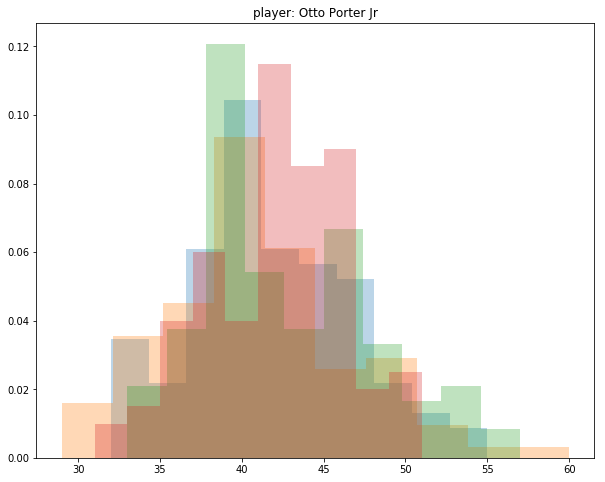

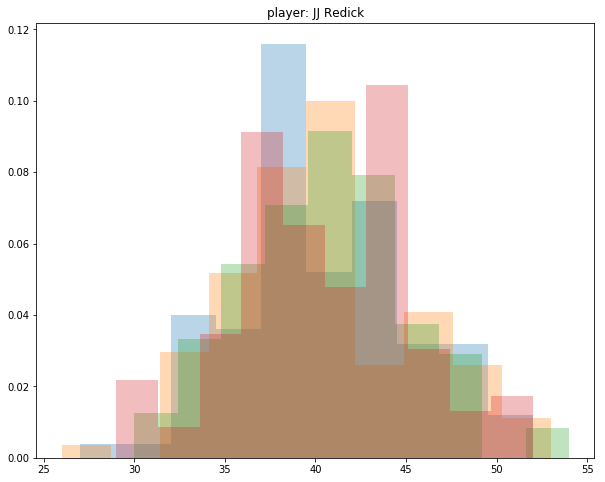

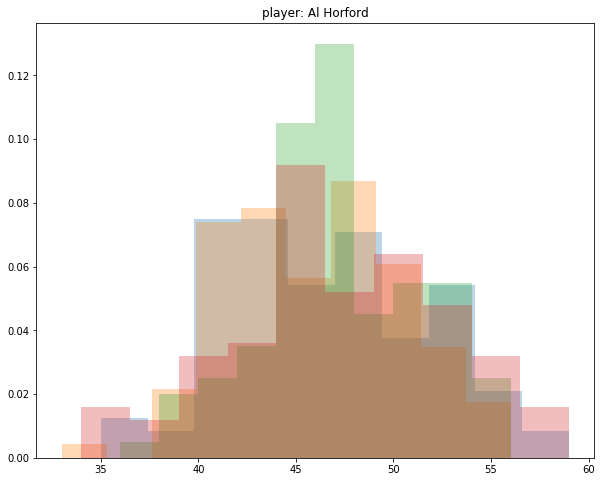

In [31]:
for _ in player_field_goal_data:
    a_post = a + sum([i[0] for i in player_field_goal_data[_]])
    b_post = b + sum([i[1] for i in player_field_goal_data[_]]) \
    - sum([i[0] for i in player_field_goal_data[_]])
    p_post = sts.beta.rvs(a_post, b_post) #, size=1)
    plt.figure(figsize=(10, 8))
    for game in range(4):
        dist_post = sts.binom.rvs(n, p_post, size=100)
        plt.title('player: ' + str(_))
        plt.hist(dist_post, density=True, alpha=0.3)
    plt.show()

# Generating samples GPS measurements [code from session 9.1]

### Problem description

Below are 3 representations of the same model — mathematical, directed graph, factor graph. Use any of these representations to generate and plot random samples from the complete state of the model. The complete state of the model contains the position, velocity and GPS measurement at every point in time.

See the example code at the bottom of the notebook to get you started. There are some specific tasks to do and questions to answer there.

### Mathematical definition

Notation:
* $x_t$ — position at time $t$
* $v_t$ — velocity at time $t$
* $y_t$ — GPS measurement at time $t$
* with $t=0, 1, \ldots, T$

Initial state:
* Position: $x_0 \sim \text{Normal}(\mu_{x_0}, \sigma_{x_0}^2)$
* Velocity: $v_0 \sim \text{Normal}(\mu_{v_0}, \sigma_{v_0}^2)$

State update equations:
* Position: $x_{t+1} \sim \text{Normal}(x_t + v_t, \sigma_x^2)$
* Velocity: $v_{t+1} \sim \text{Normal}(v_t, \sigma_v^2)$

Measurement equation:
* $y_{t} \sim \text{Normal}(x_t, \sigma_y^2)$

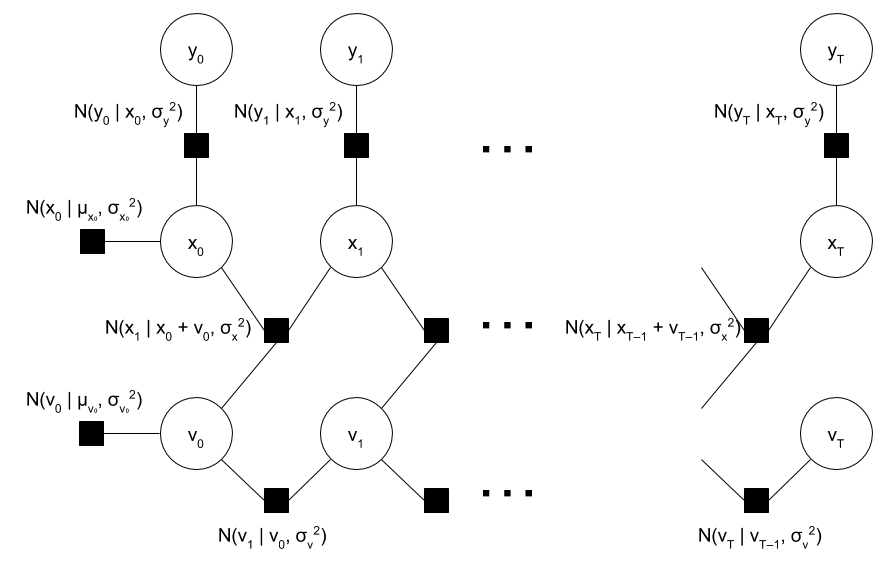

In [33]:
Image.open("8.1-factor-graph.png")

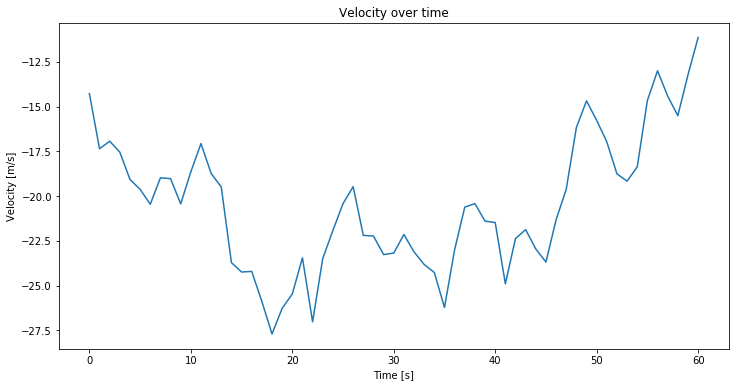

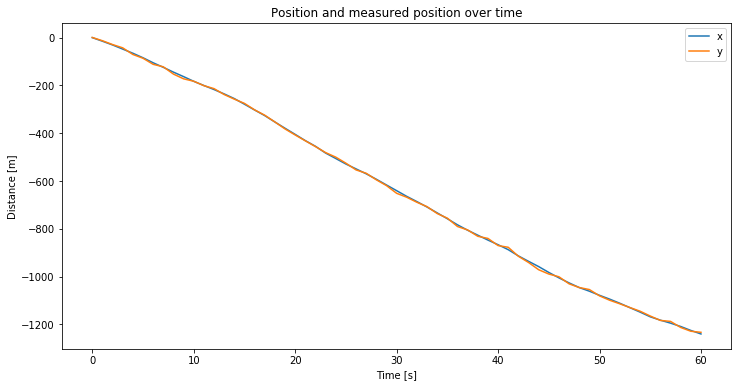

In [34]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

# We use the parameter values below for this activity. Units are shown in square brackets.

T = 60                # Track for 1 minute. [s]
mu_x0 = sigma_x0 = 0  # Set the initial position to 0 so that all our plots start
                      # from the same point. [m]
mu_v0 = 0             # The initial velocity is centered on 0 since we don't know
                      # in which direction (positive or negative) cars are traveling. [m/s]
sigma_v0 = 13         # This puts our initial speed below the speed limit (approx.
                      # 33.3m/s or 120km/h or 75mph) with 99% probability.
                      # Speed limits vary by country. [m/s]
sigma_x = 1           # How much our position can vary around adding the velocity to
                      # the previous position. [m]
sigma_v = 1.5         # How much the velocity changes per second. Full acceleration
                      # for an average car is 3–4 m/s². This value means we accelerate
                      # less than 3m/s² about 95% of the time. [m/s²]
sigma_y = 5           # The given GPS measurement error. [m]


# Here is how to sample the initial position and velocity.
x0 = sts.norm(mu_x0, sigma_x0).rvs()
v0 = sts.norm(mu_v0, sigma_v0).rvs()

x = [x0]
v = [v0]
for t in range(1, T+1):
    # TASK 1:
    # Now you have to sample the position and velocity at each time.
    x.append(sts.norm(x[t-1]+v[t-1],sigma_x).rvs())
    v.append(sts.norm(v[t-1],sigma_v).rvs())


# Once we have all the position variables, we can sample the
# measurement variables simultaneously.
y = sts.norm.rvs(x, sigma_y, size=T+1)

#
# QUESTION 1:
# Why can we sample all the measurement variables simultaneously?
# They do not depend on any of their own group so they can be calculated together
# They just depend on x so once we have all of x they can be calculated.

# Plot the velocity over time
plt.figure(figsize=(12, 6))
plt.plot(range(T+1), v)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title('Velocity over time')

# Plot the position and measurements over time
plt.figure(figsize=(12, 6))
plt.plot(range(T+1), x, label='x')
plt.plot(range(T+1), y, label='y')
plt.title('Position and measured position over time')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.legend()
plt.show()

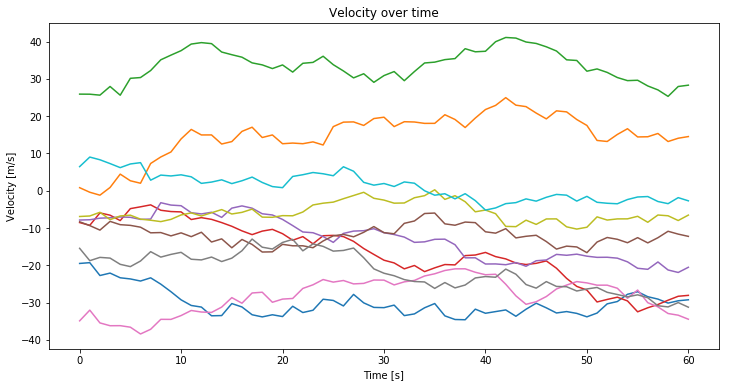

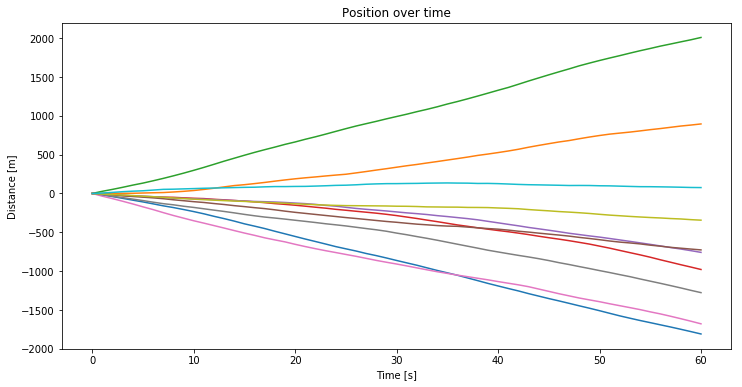

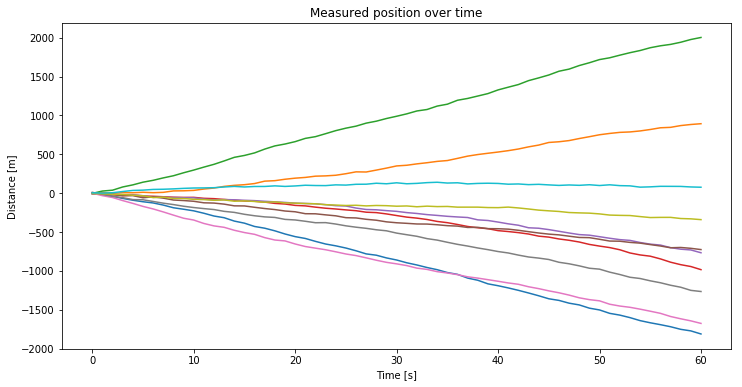

In [35]:
# TASK 2:
# Generate 10 different samples of the complete state of the model and
# plot the 10 samples.
#
#  * Use one plot for the 10 velocity samples,
#  * one plot for the 10 position samples, and#
#  * one plot for the 10 measurement samples.
#
# Remember that 1 sample contains the position, velocity and measurements
# for all time values.


def sample():
    x0 = sts.norm(mu_x0, sigma_x0).rvs()
    v0 = sts.norm(mu_v0, sigma_v0).rvs()
    x = [x0]
    v = [v0]
    for t in range(1, T+1):
        # TASK 1:
        # Now you have to sample the position and velocity at each time.
        x.append(sts.norm(x[t-1]+v[t-1],sigma_x).rvs())
        v.append(sts.norm(v[t-1],sigma_v).rvs())  
    y = sts.norm.rvs(x, sigma_y, size=T+1)
    return x,v,y

position = []
velocity = []
measurement = []
#generating 10 samples by running sample()
for i in range(10):
    x, v, y = sample()
    position.append(x)
    velocity.append(v)
    measurement.append(y)

# Plot the velocity over time
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(range(T+1), velocity[i])
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title('Velocity over time')

# Plot the position over time
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(range(T+1), position[i])
plt.title('Position over time')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.show()

# Plot measurements over time
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(range(T+1), measurement[i])
plt.title('Measured position over time')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.show()
